# Exercise 5

## Problem 1: Visualizing a map

In [1]:
#Edit the "shopping center" text file to include the same shopping centers as the dominance area shapefile
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS
import requests
import geojson
from geopandas.tools import geocode
import matplotlib.pyplot as plt

# Read the data (replace "None" with your own code)
centers = pd.read_csv("docs/shopping_centers.txt", sep=";")
#Geocode
geo = geocode(centers["addr"],provider="nominatim", user_agent="autogis_IA", timeout=5)
geo.head()

,geometry,address
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,..."
2,POINT (24.73779 60.16294),"Sports Academy, 11, Piispansilta, Matinkylä, S..."
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku..."
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."


In [2]:
# Join the tables to include name data
centers = geo.join(centers)
centers.head()

,geometry,address,id,name,addr
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,...",1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,POINT (24.73779 60.16294),"Sports Academy, 11, Piispansilta, Matinkylä, S...",2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku...",3,Dixi,"Ratatie 11, 01300 Vantaa, Finland"
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"


In [3]:
#Read the rets of files
# Filepaths
grid_fp = "docs/grid_dominance_areas.shp" #The shapefile of dominance areas of shopping centers in Exercise 4
roads_fp = "docs/roads.shp"
metro_fp = "docs/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [4]:
#Rename column values of dominant shopping centers
grid["dominant_s"].replace({"pt_r_t_Dixi": "Dixi" , "pt_r_t_Forum": "Forum", "pt_r_t_IsoOmena": "Iso Omena", "pt_r_t_Itis": "Itis",
                          "pt_r_t_Jumbo": "Jumbo", "pt_r_t_Myyrmanni": "Myyrmanni", "pt_r_t_Ruoholahti": "Ruoholahti"}, inplace=True)
grid.head()

,x,y,YKR_ID,pt_r_t_Jum,pt_r_t_Dix,pt_r_t_Myy,pt_r_t_Iti,pt_r_t_For,pt_r_t_Iso,pt_r_t_Ruo,min_t,dominant_s,geometry
0,381875.0,6697880.0,5785640,101.0,102.0,90.0,132.0,110.0,141.0,118.0,90.0,Myyrmanni,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,108.0,109.0,93.0,135.0,113.0,143.0,121.0,93.0,Myyrmanni,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,109.0,111.0,95.0,137.0,115.0,145.0,123.0,95.0,Myyrmanni,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,114.0,115.0,99.0,141.0,119.0,149.0,127.0,99.0,Myyrmanni,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,98.0,99.0,83.0,125.0,103.0,134.0,111.0,83.0,Myyrmanni,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [5]:
centers

,geometry,address,id,name,addr
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Kluuvi,...",1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,POINT (24.73779 60.16294),"Sports Academy, 11, Piispansilta, Matinkylä, S...",2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,POINT (25.04400 60.29318),"Dixi, 11, Ratatie, Kukkaketo, Tikkurila, Tikku...",3,Dixi,"Ratatie 11, 01300 Vantaa, Finland"
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,POINT (24.85347 60.26019),"Myyrmanni, 3, Iskoskuja, Jönsas, Myyrmäki, Myy...",5,Myyrmanni,"Iskoskuja 3, 01600 Vantaa, Finland"
6,POINT (24.91048 60.16363),"HopLop Ruoholahti, 21, Itämerenkatu, Ruoholaht...",6,Ruoholahti,"Itämerenkatu 21, 00180 Helsinki, Finland"


In [6]:
#Check CRS
print(grid.crs)
print(roads.crs)
print(metro.crs)
print(centers.crs)

epsg:3067
epsg:2392
epsg:2392
EPSG:4326


In [7]:
#Reproject
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)
centers = centers.to_crs(crs=grid.crs)

In [8]:
#Add name column to metro
metro["name"] = "Metro"
#And to roads
roads["name"] = "Roads"

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


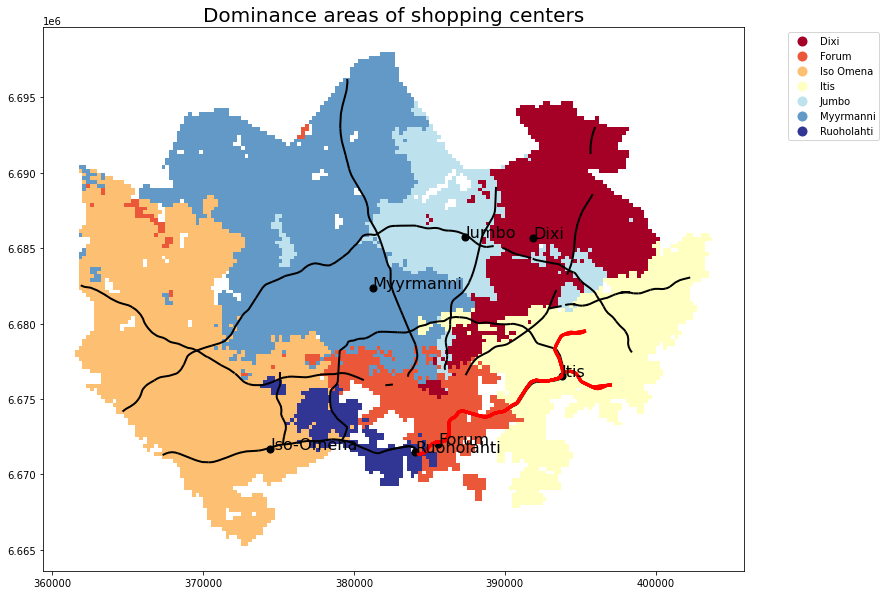

In [9]:
# Define output filename for the figure in here and use it when saving the file:
output_fp = "docs/dominance_areas_roads.png"

# Create plot
fig, ax = plt.subplots(figsize=(14,10))
grid.plot(ax=ax, column="dominant_s", cmap="RdYlBu", legend = True)
roads.plot(ax=ax, color="black", linewidth=2)# legend = True)
metro.plot(ax=ax, color="red", linewidth=3)#legend = True)
centers.plot(ax=ax, column="name", marker='o', color='black', markersize=50) #color="black")

#Add labels to points in the map
texts = []

for x, y, label in zip(centers.geometry.x, centers.geometry.y, centers["name"]):
    texts.append(plt.text(x, y, label, fontsize = 16))

#Set title
ax.set_title('Dominance areas of shopping centers', fontdict={'fontsize': '20', 'fontweight' : '4'})

#Put legend to place
ax.get_legend().set_bbox_to_anchor((1.2,1))

#Save figure
plt.savefig(output_fp, dpi=300)

## Problem 2: Visualize an interactive map